In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')      

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df['Taxable.Income'].max()

99619

In [16]:
df['Taxable.Income'].min()

10003

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

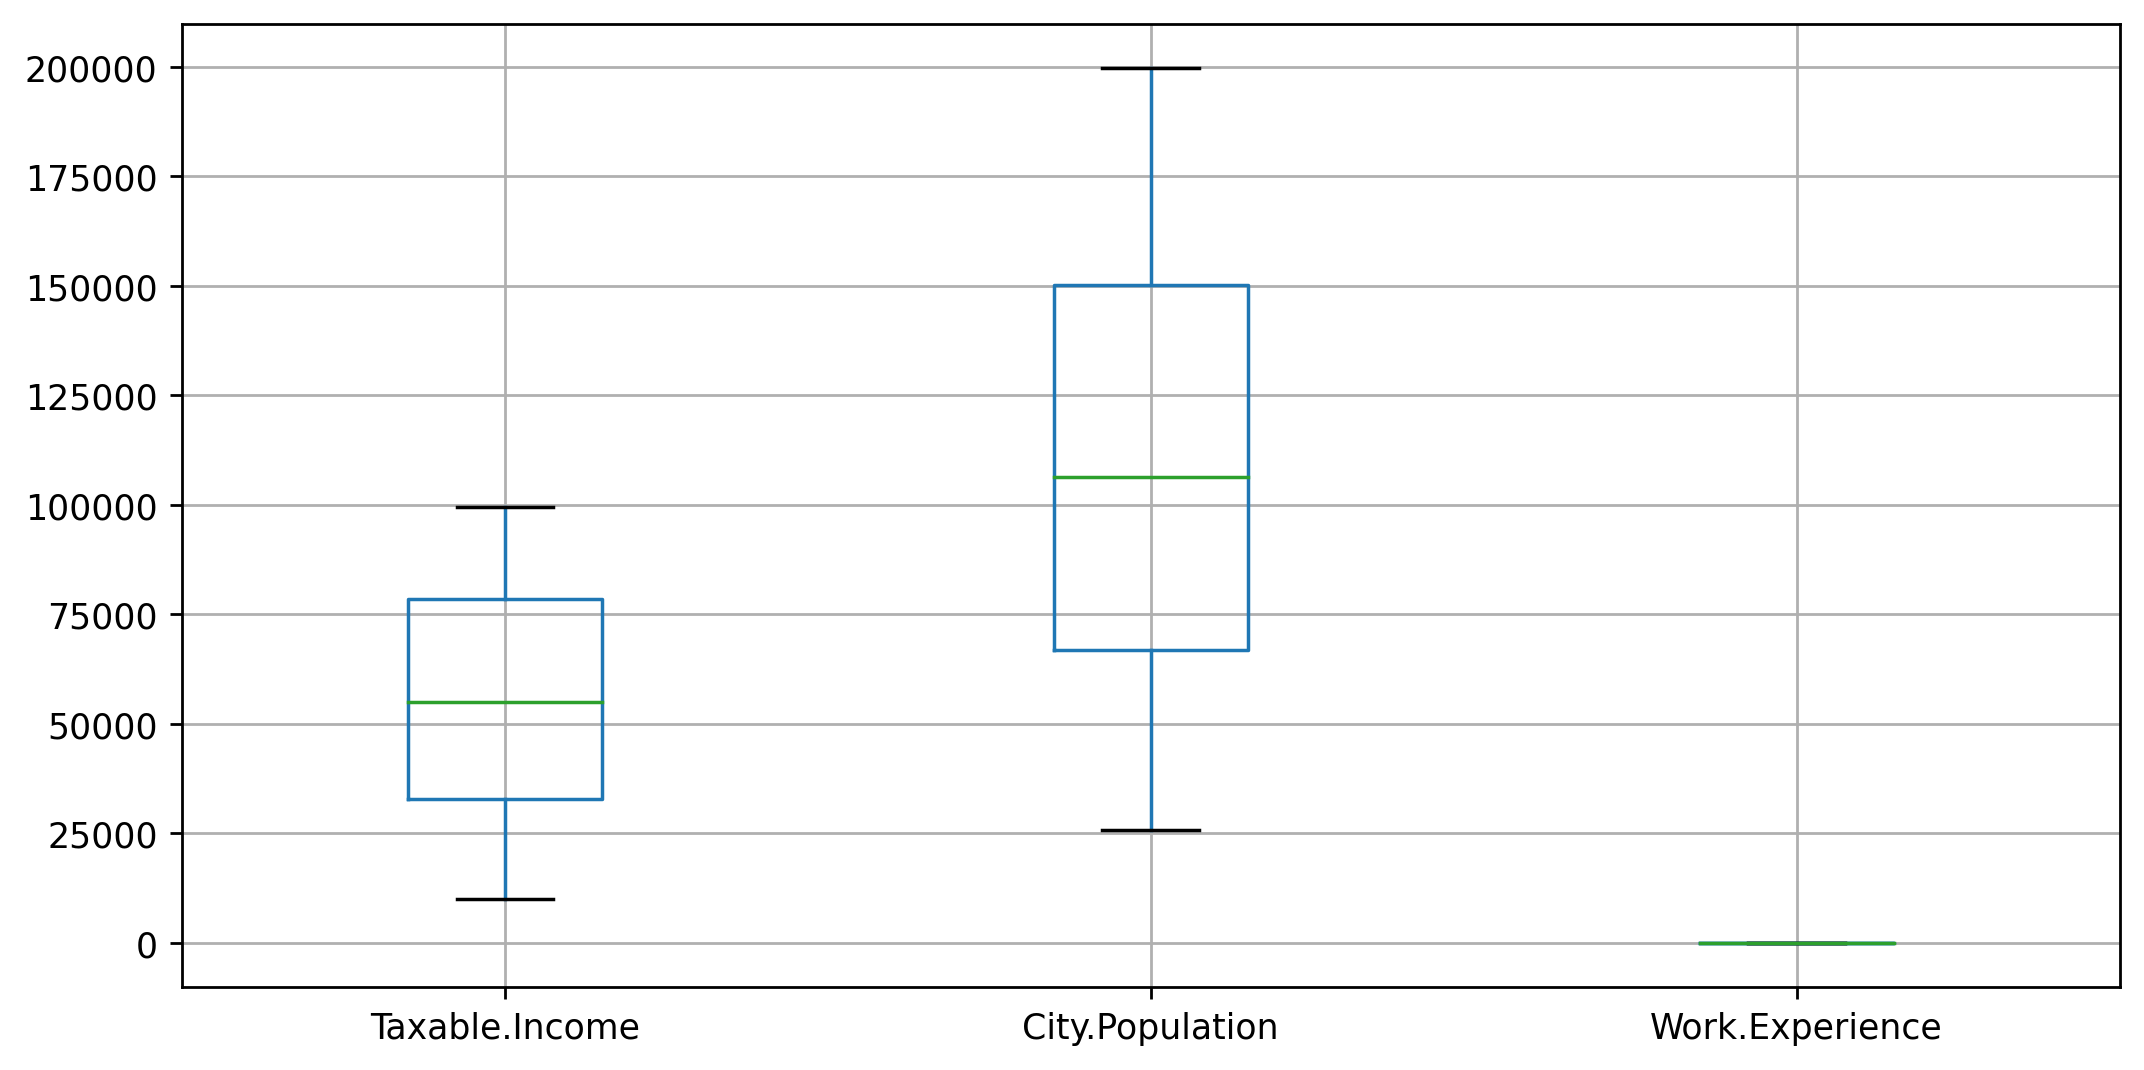

In [7]:
df.boxplot()

<AxesSubplot:xlabel='Undergrad', ylabel='count'>

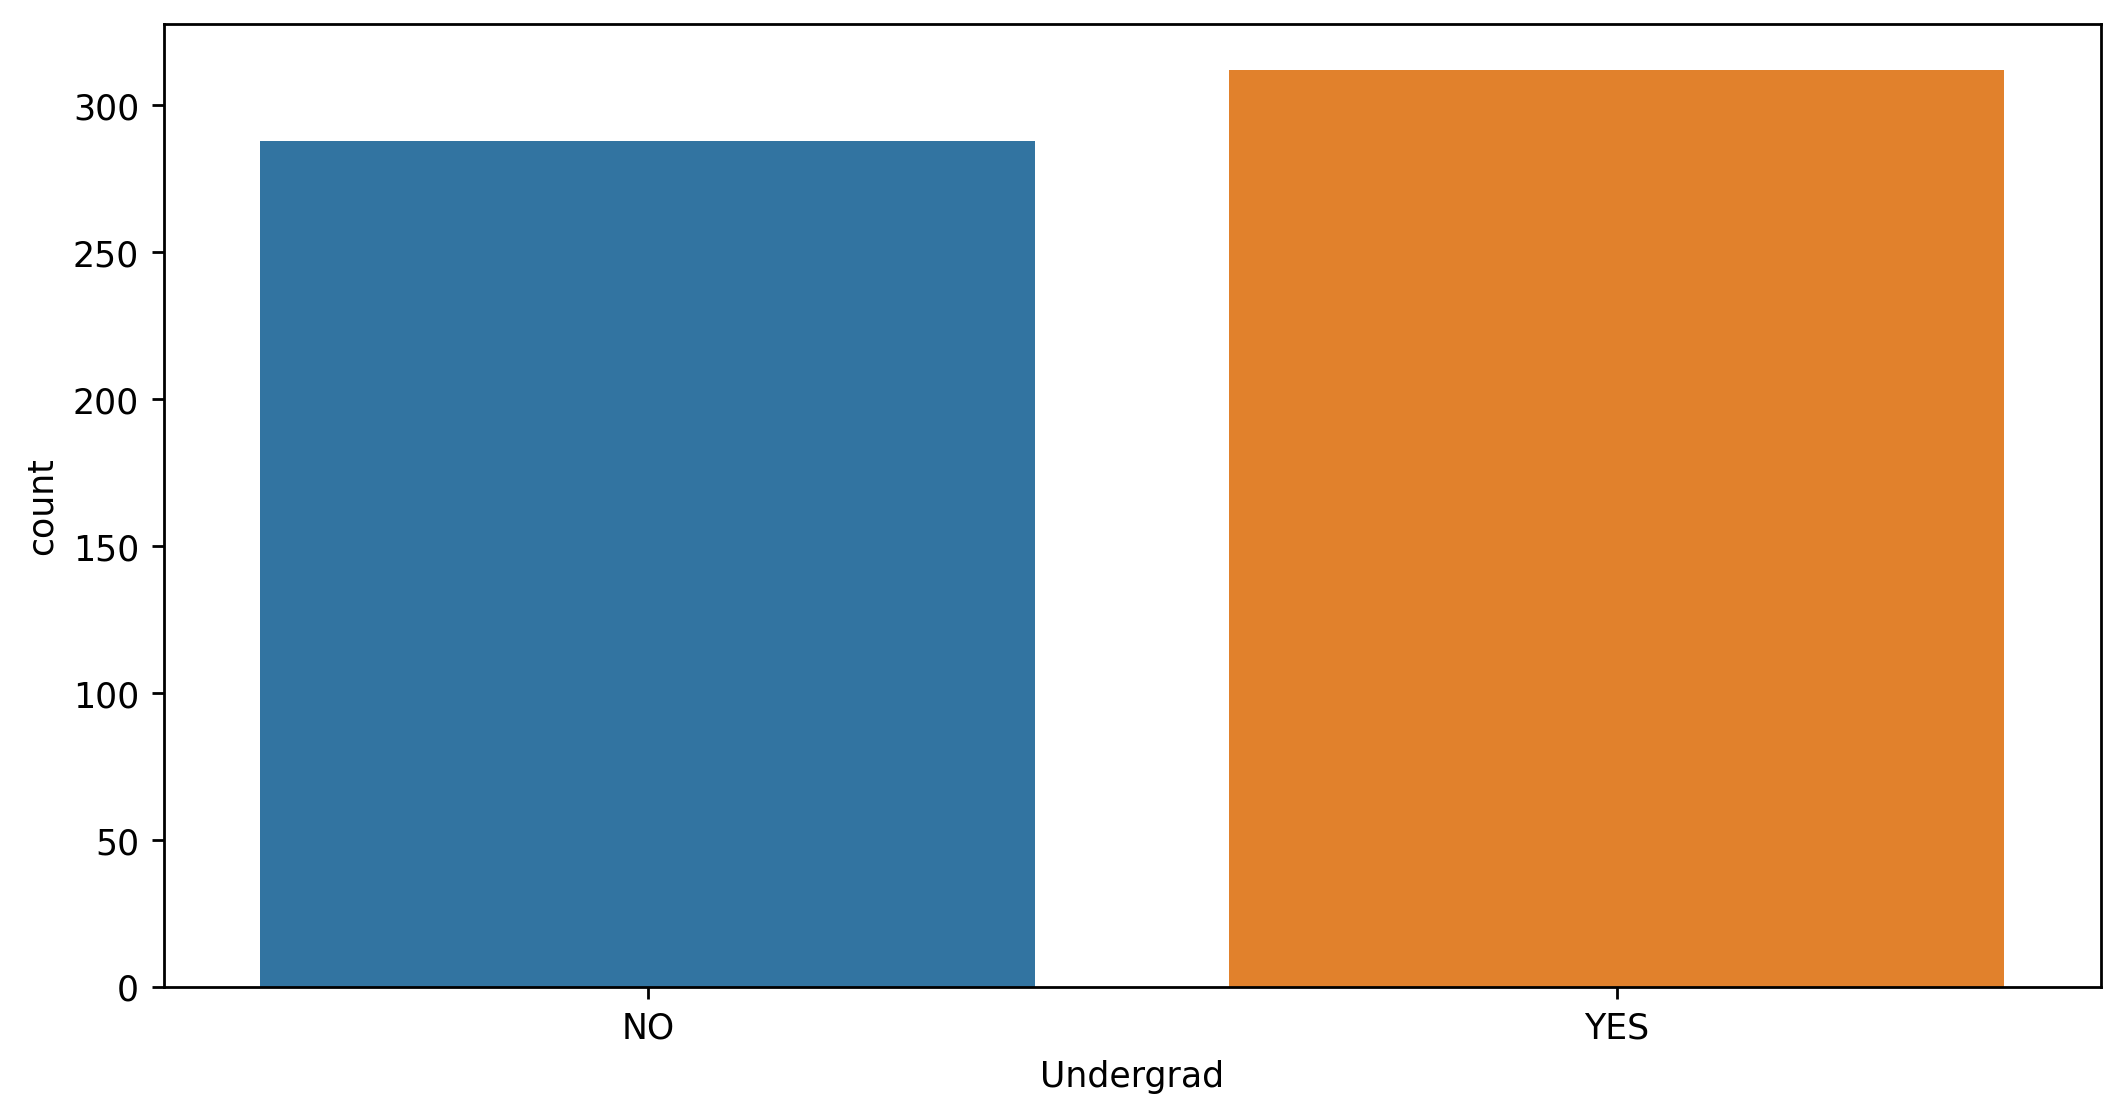

In [8]:
sns.countplot(df['Undergrad'])

<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

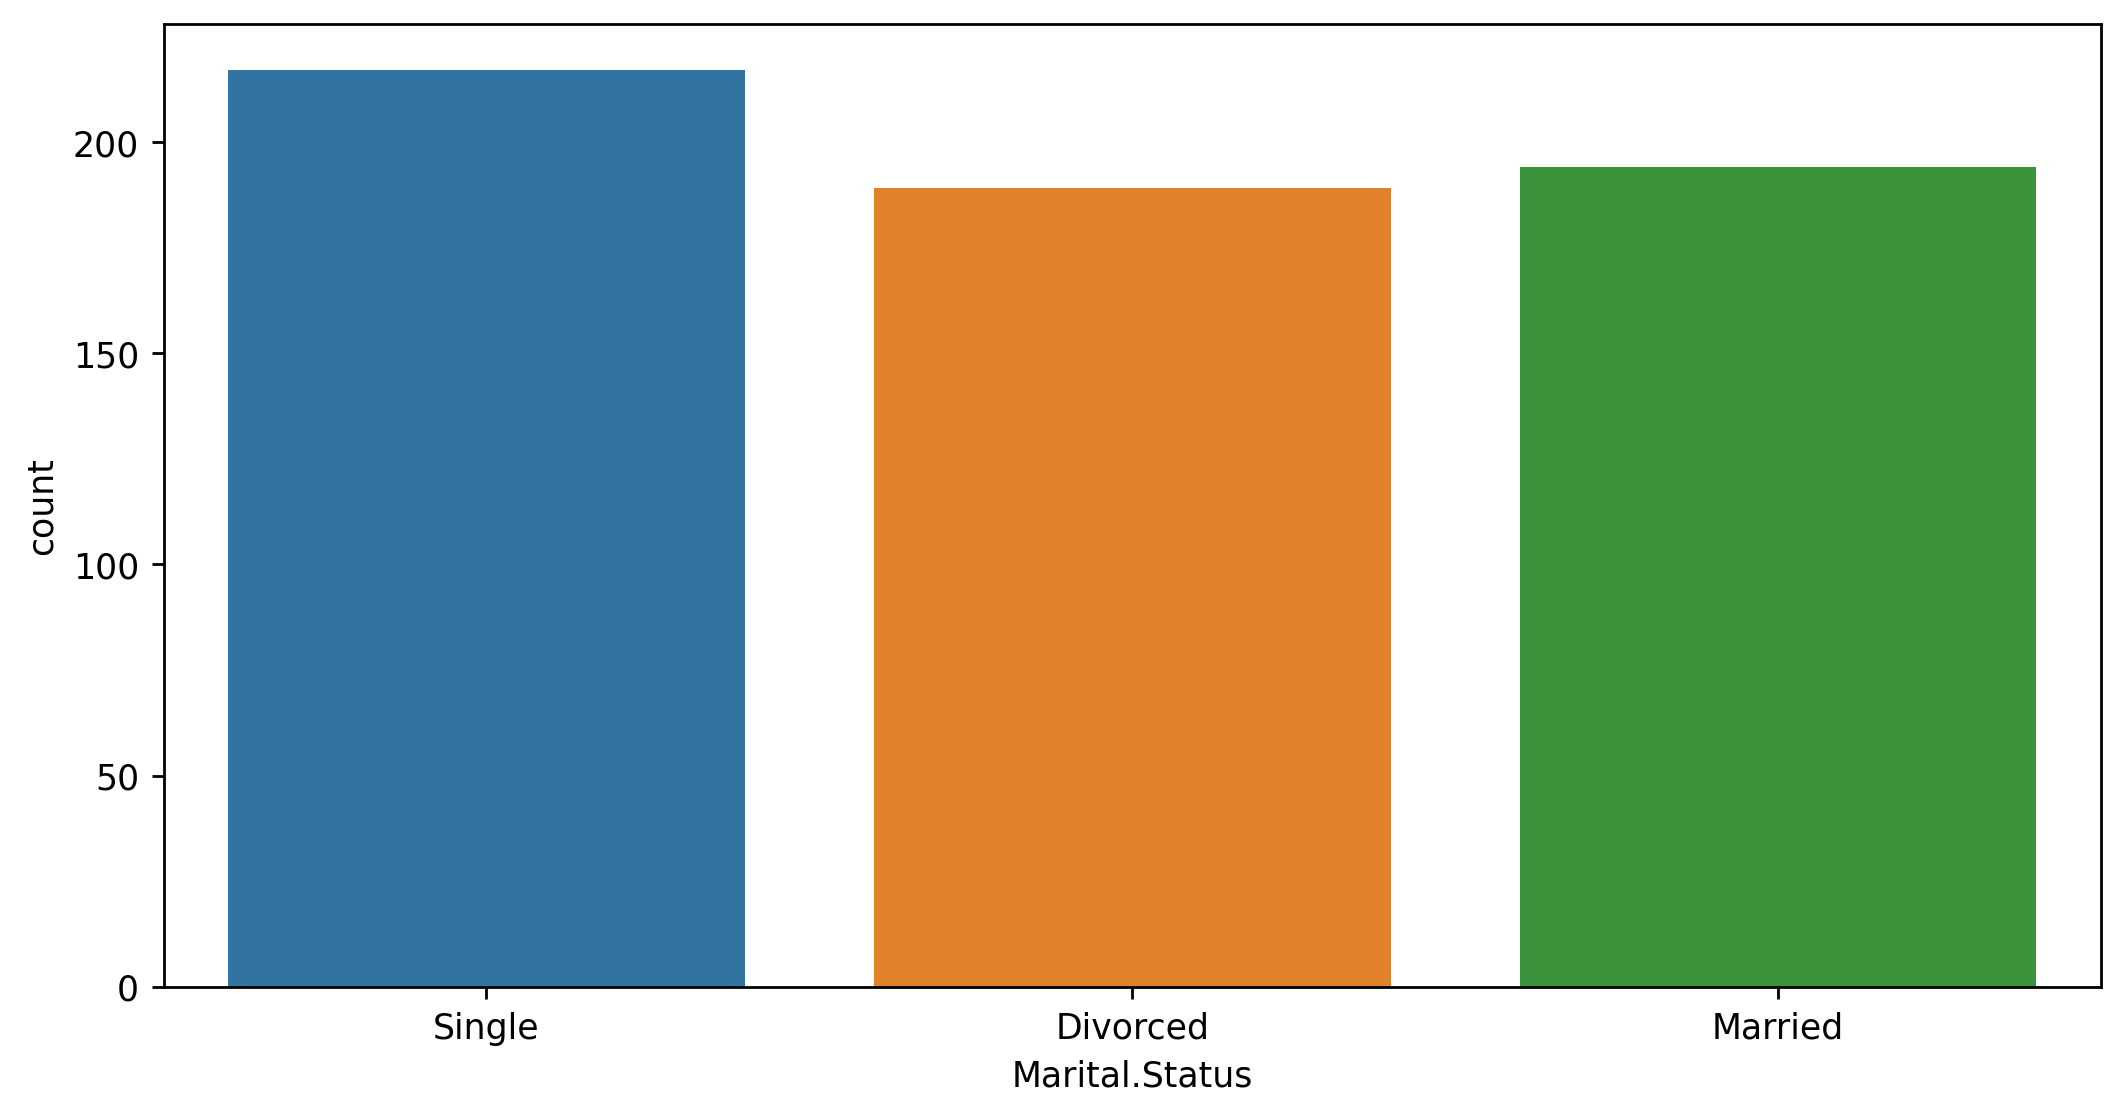

In [9]:
sns.countplot(df['Marital.Status'])

<AxesSubplot:xlabel='Urban', ylabel='count'>

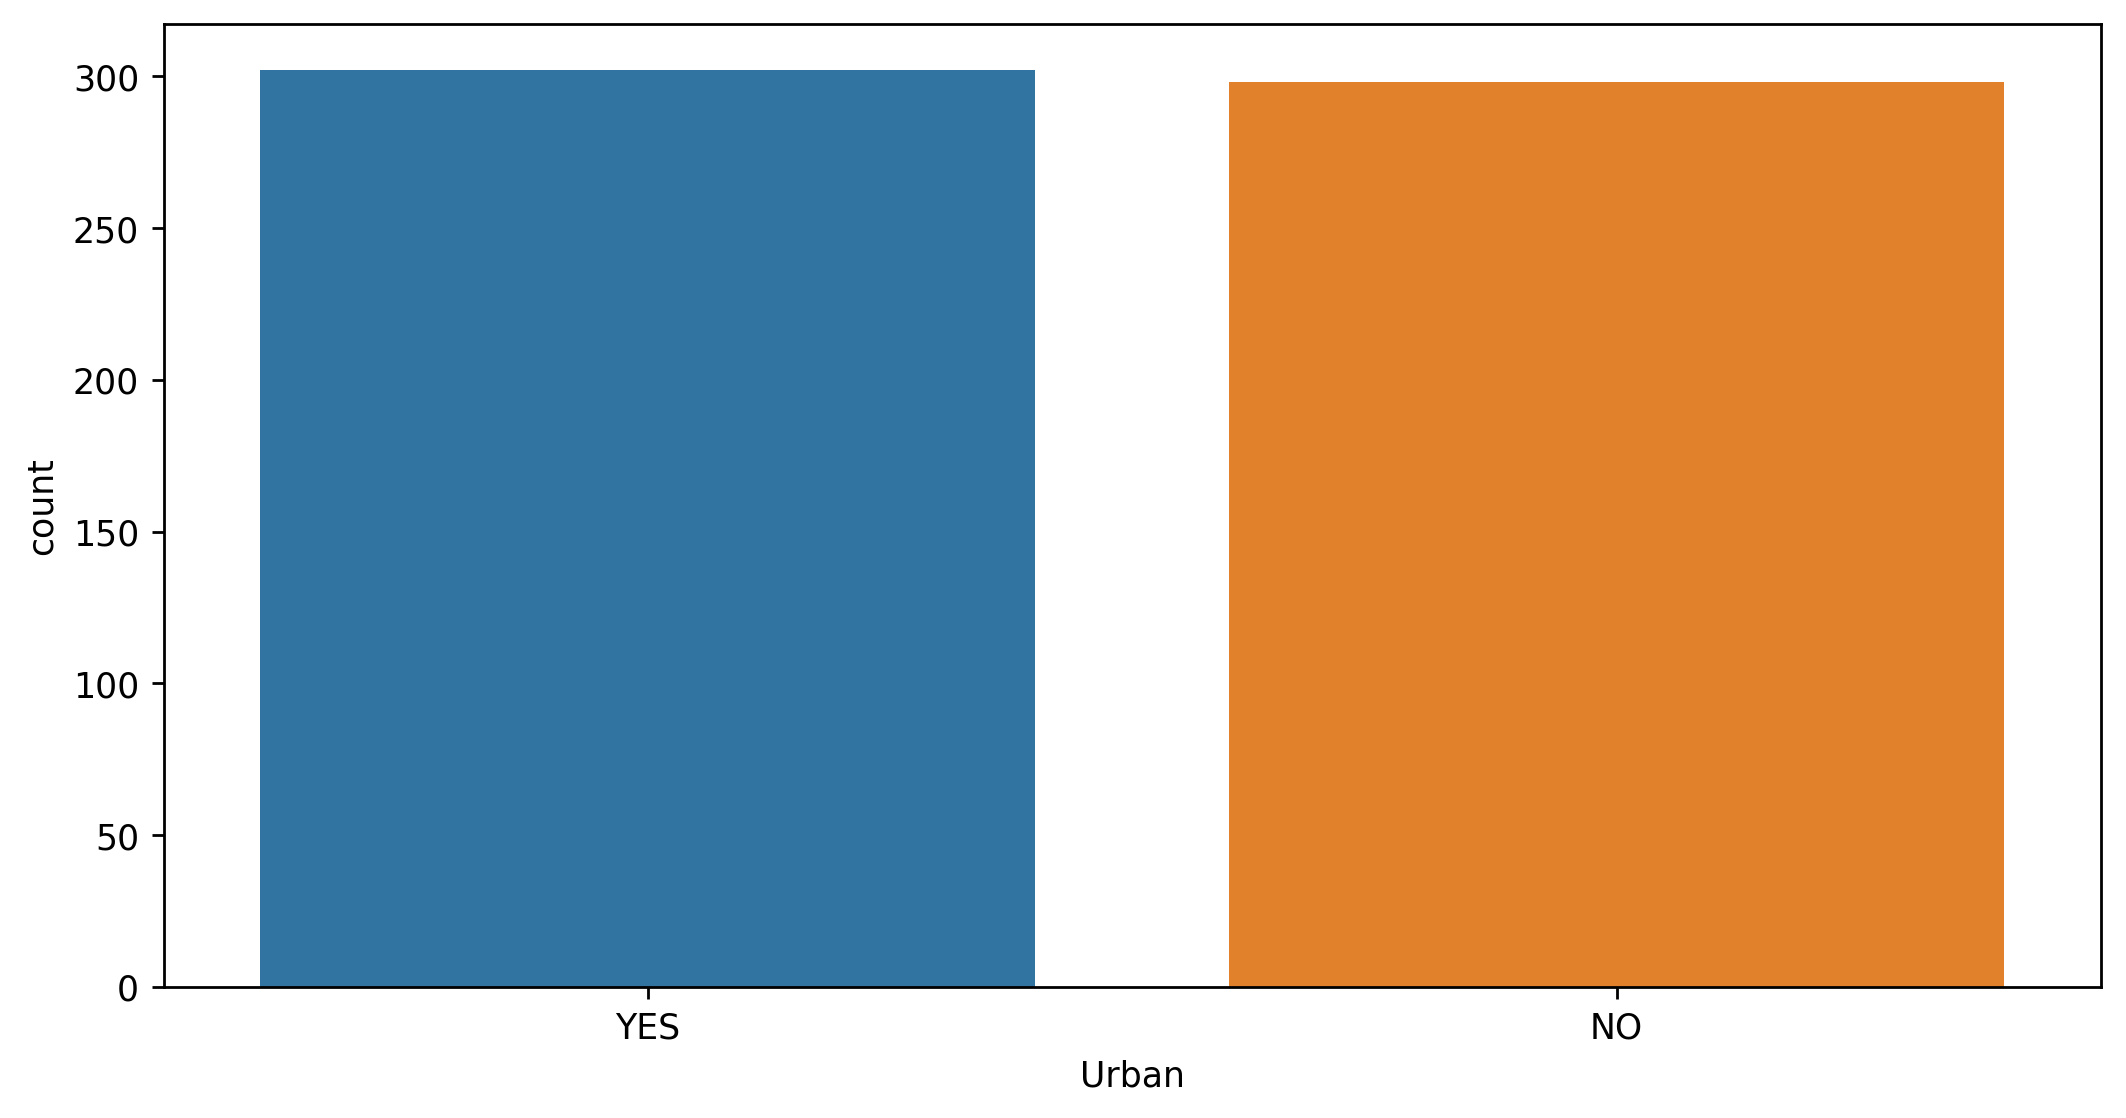

In [10]:
sns.countplot(df['Urban'])

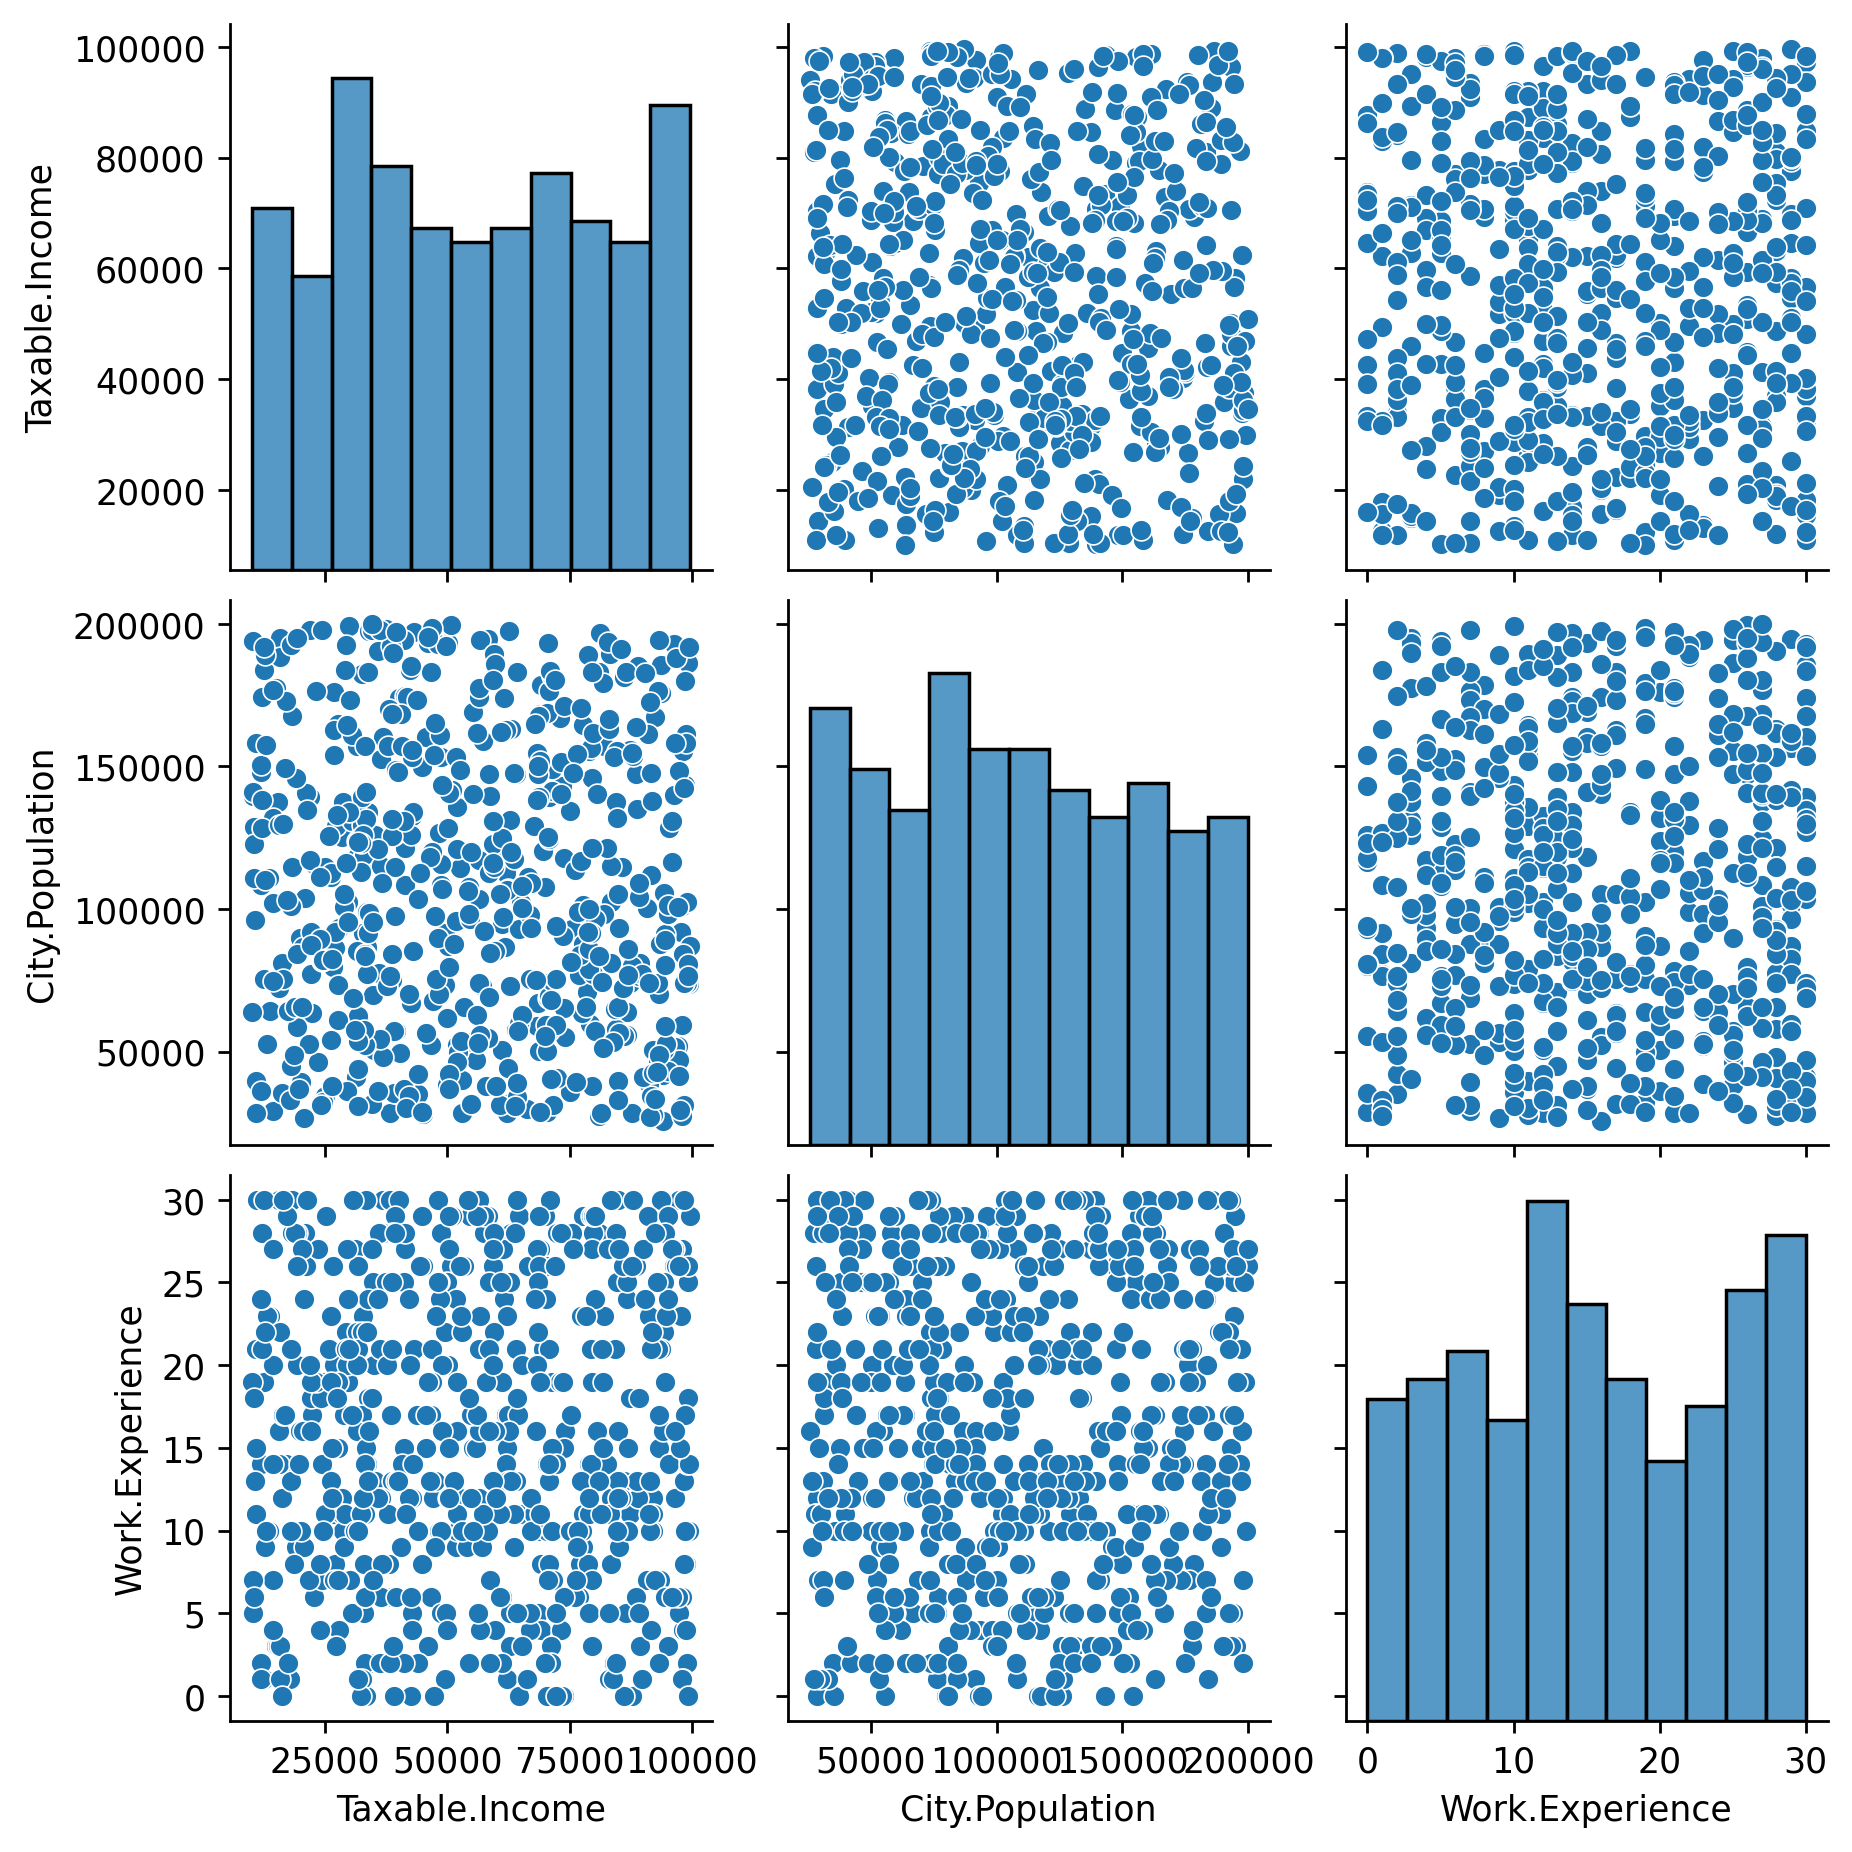

In [12]:
## Checking relationship of numerical variables

sns.pairplot(df)

In [13]:
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


<AxesSubplot:>

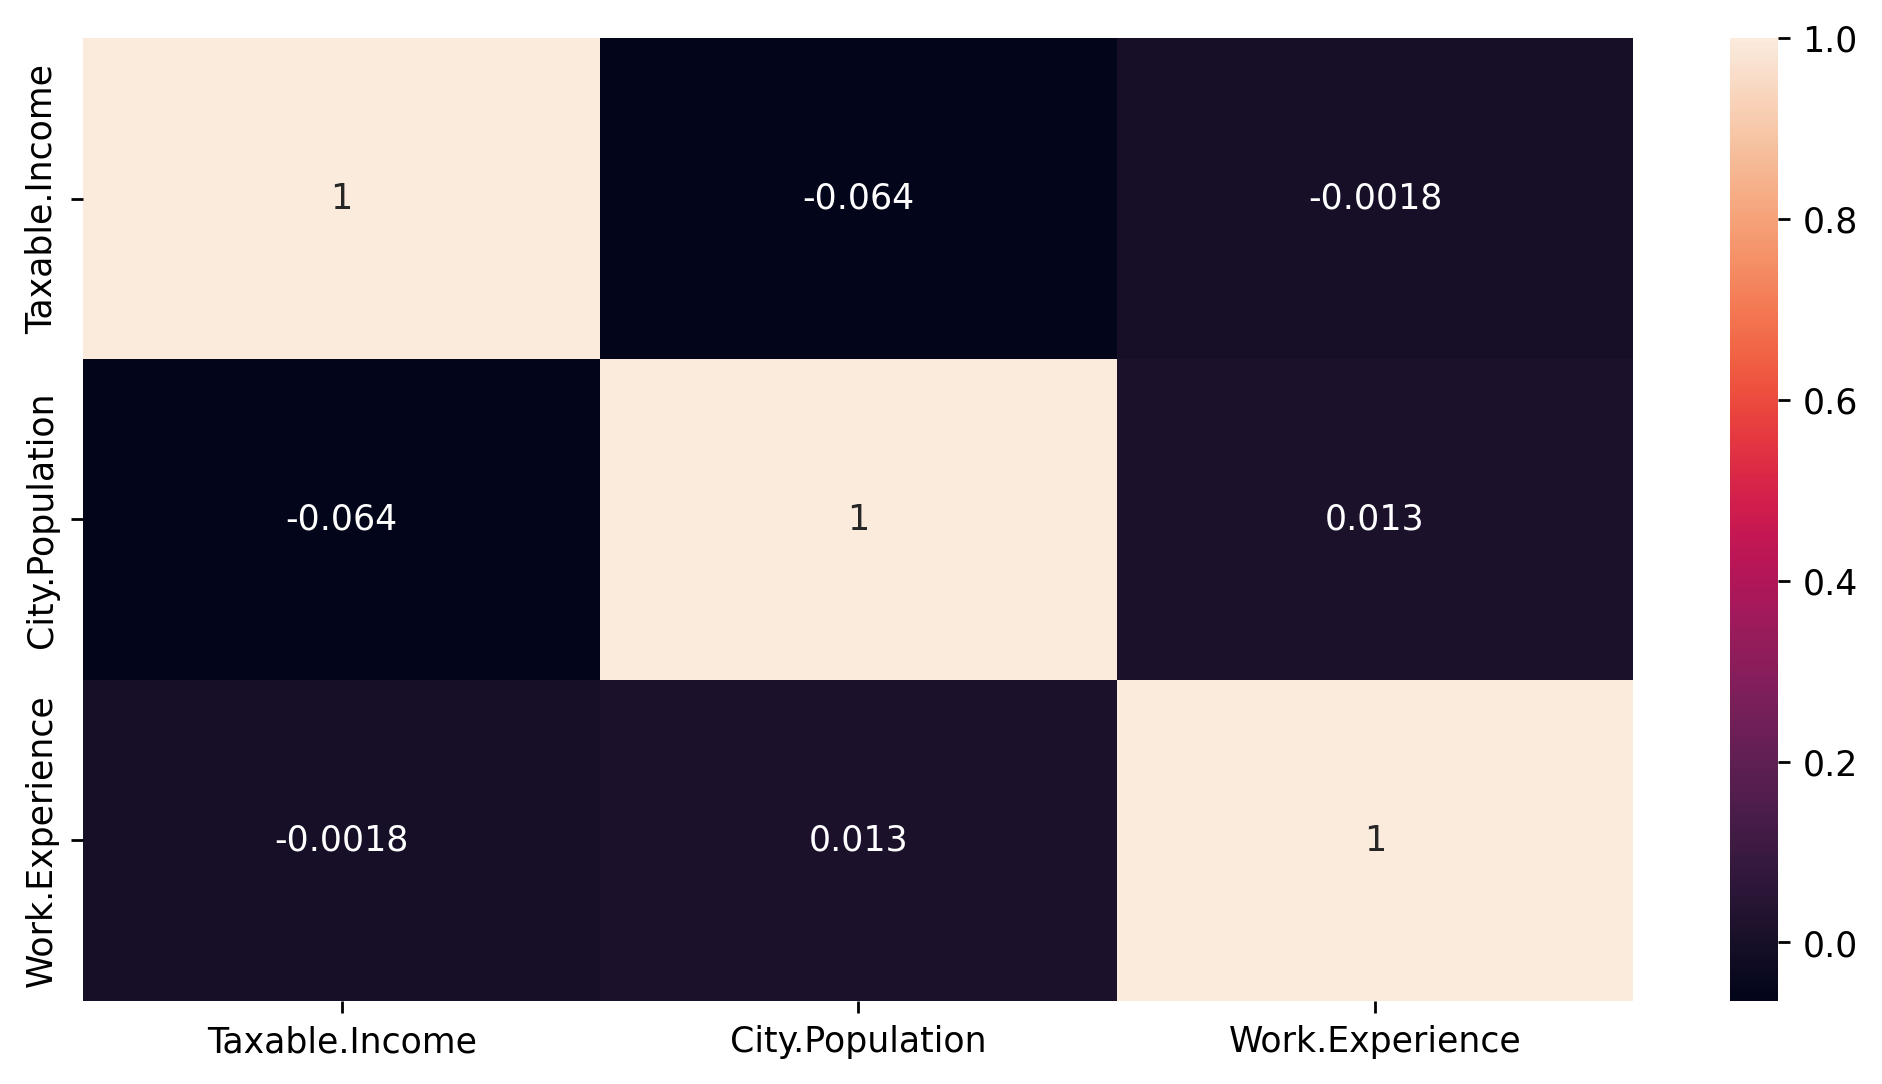

In [42]:
sns.heatmap(df.corr(),annot=True)

In [34]:
Tax_group=pd.cut(df['Taxable.Income'],bins=[10000,30000,99620],labels=['Risky','Good'])

In [35]:
df['Tax_group']=Tax_group

In [31]:
pd.set_option('display.max_rows',None)

In [32]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_group
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [36]:
df['Tax_group'].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [37]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
Tax_group          0
dtype: int64

<AxesSubplot:xlabel='Tax_group', ylabel='count'>

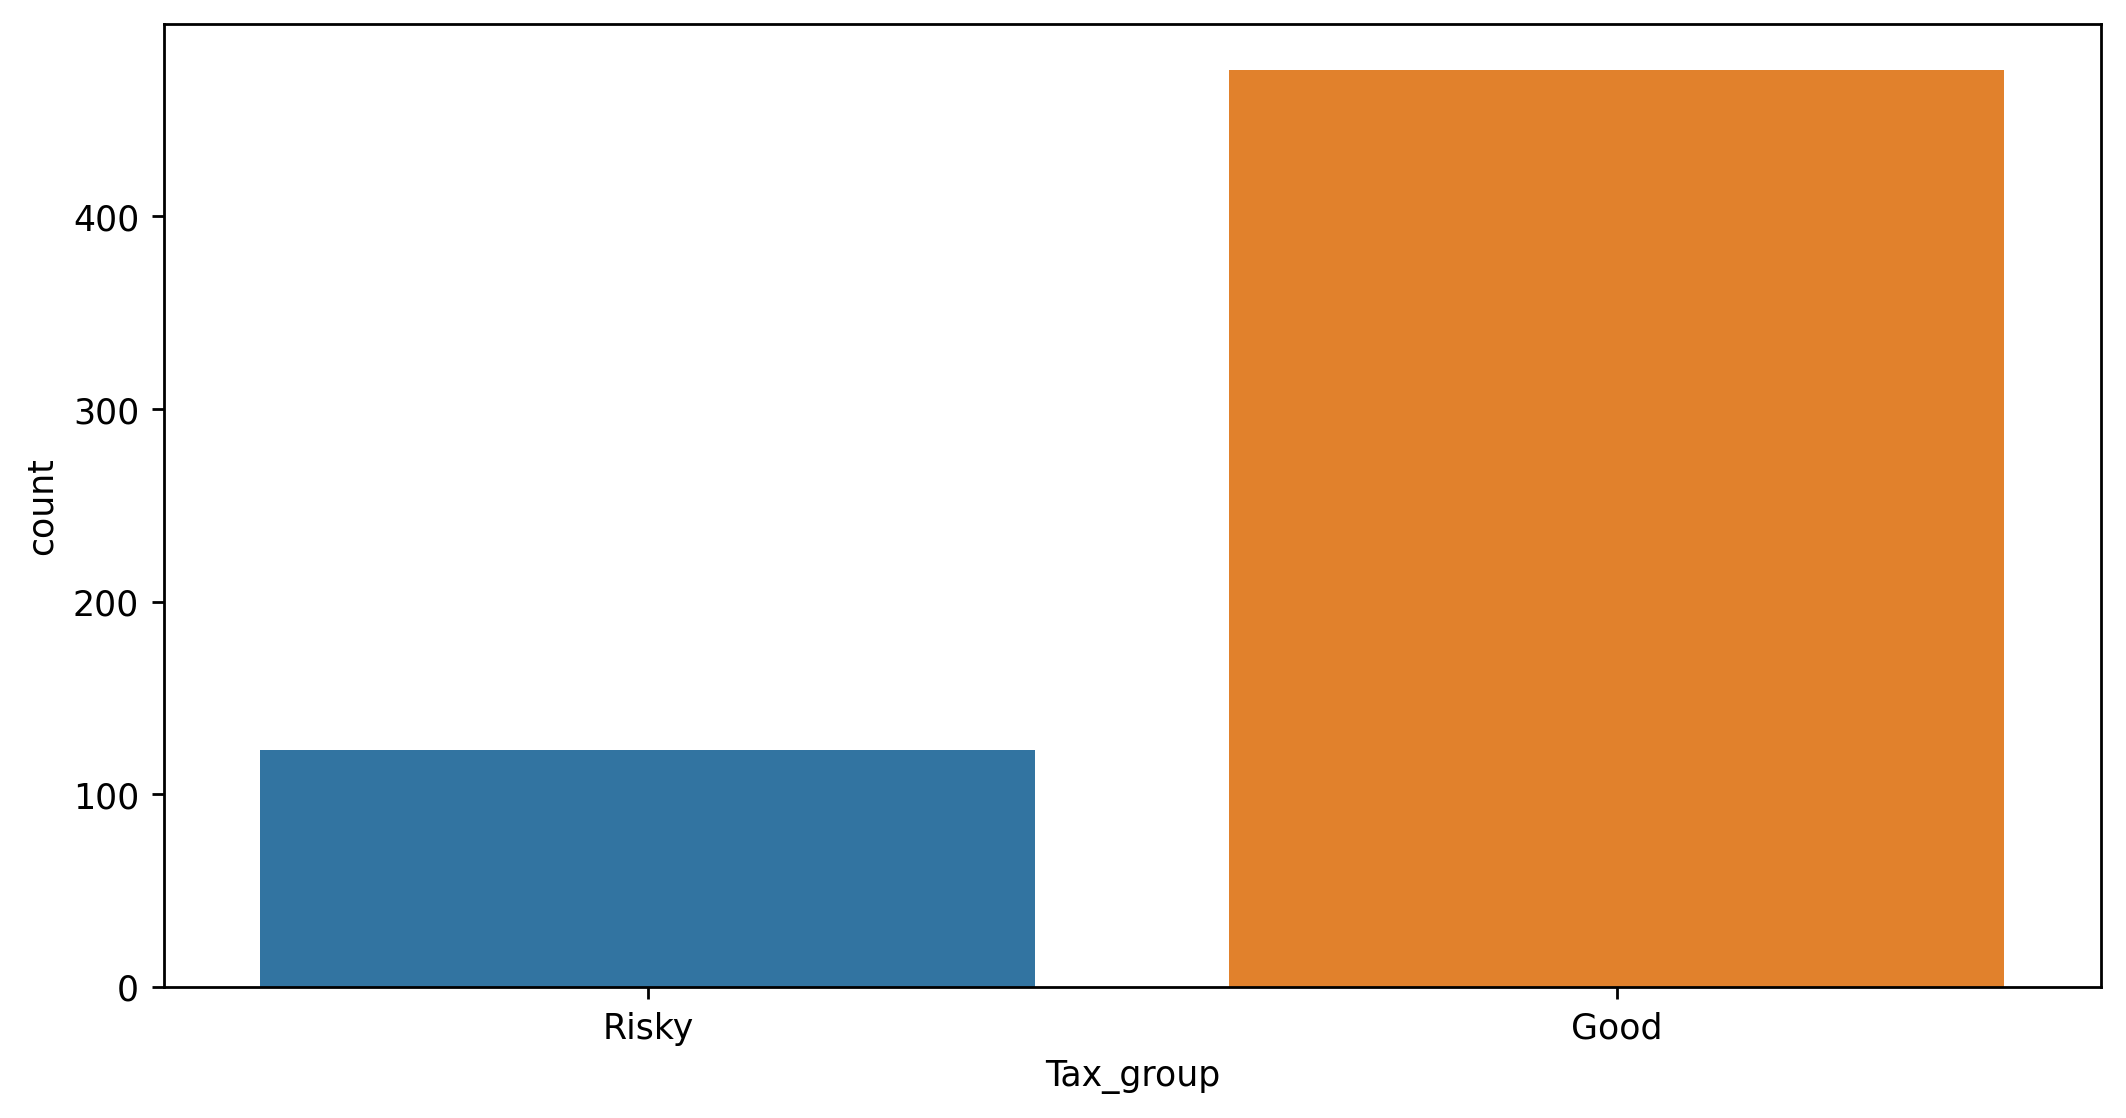

In [33]:
sns.countplot(df['Tax_group'])

In [38]:
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_group
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good


<AxesSubplot:xlabel='Undergrad', ylabel='count'>

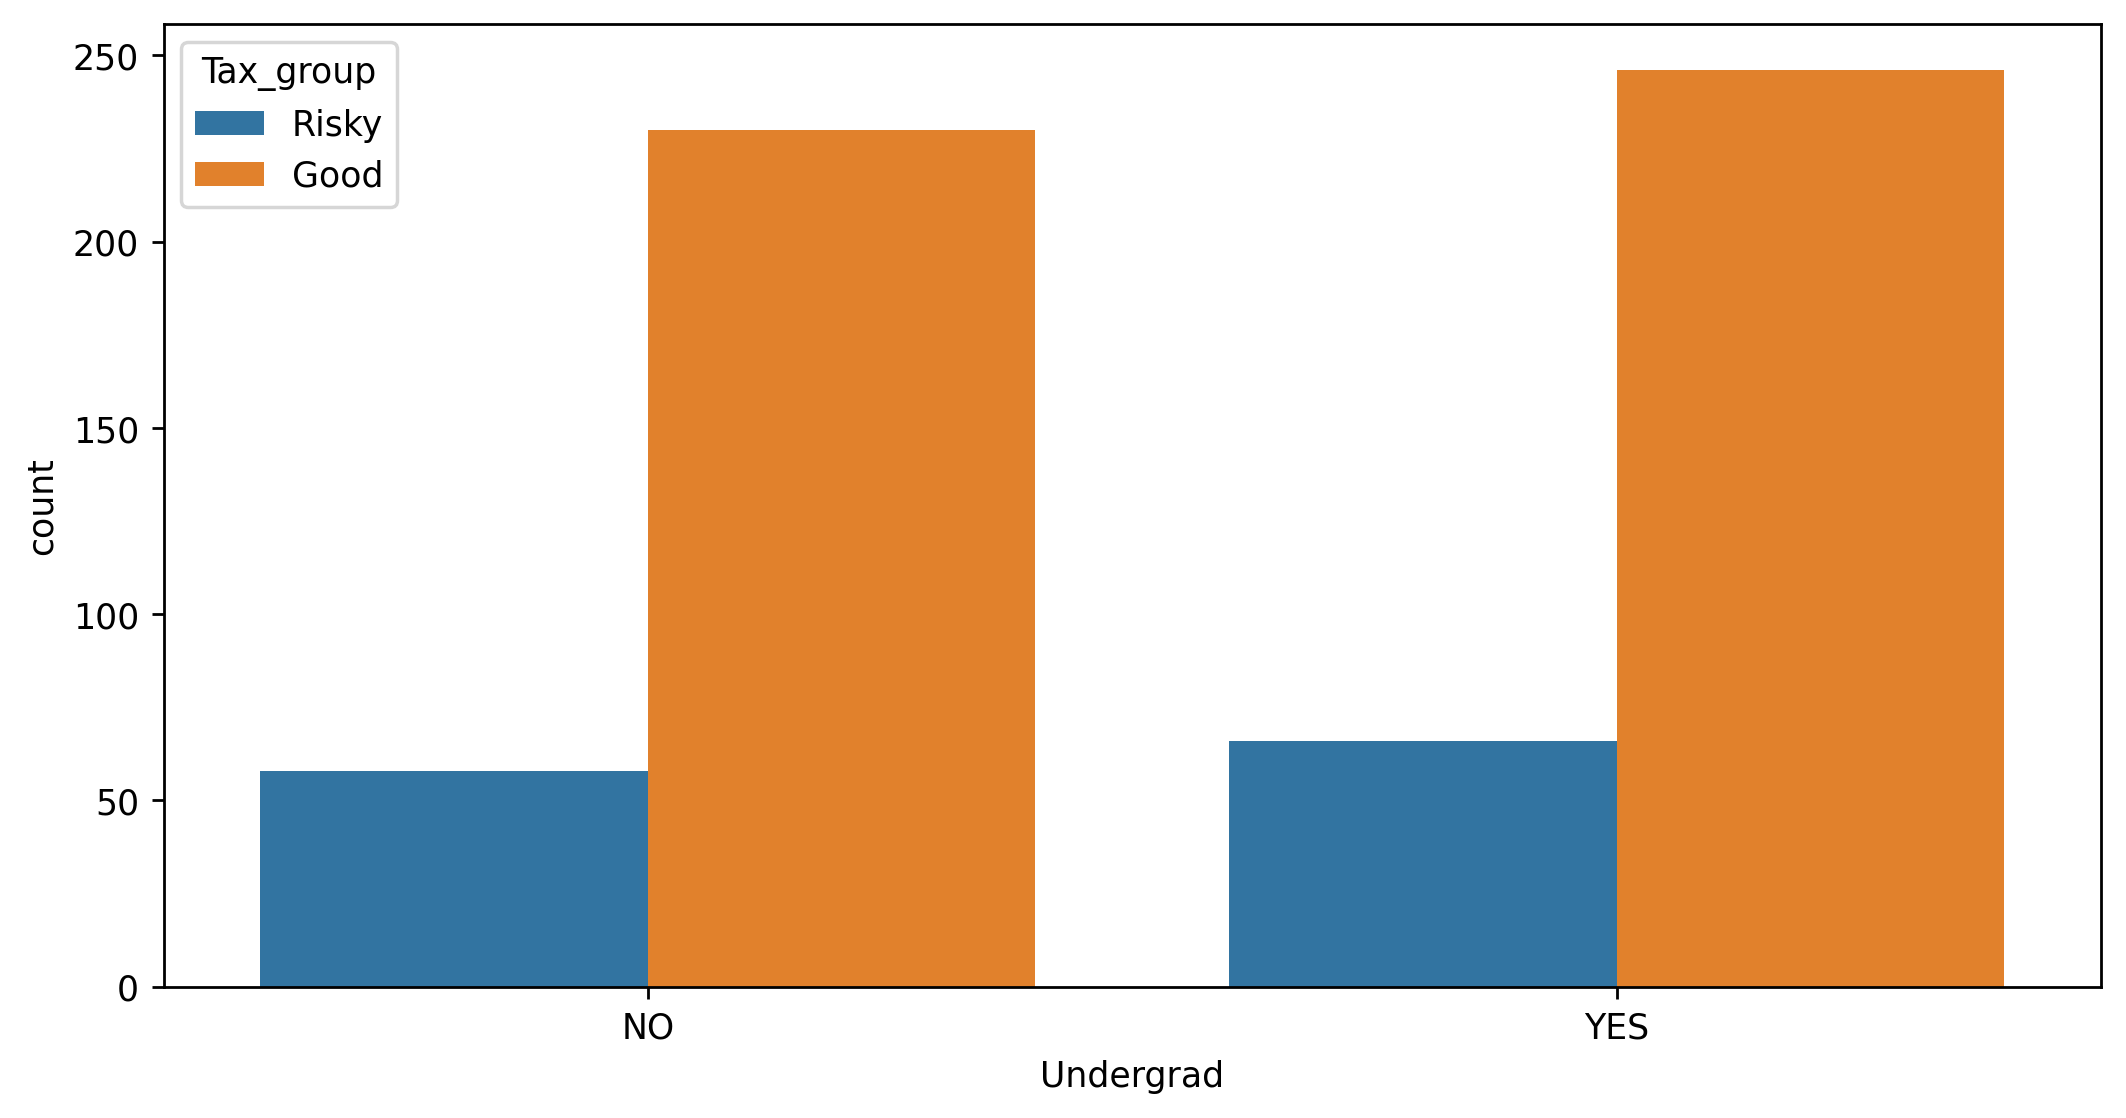

In [39]:
# Checking the relationship between categorical variables

sns.countplot(df['Undergrad'],hue=df['Tax_group'])

<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

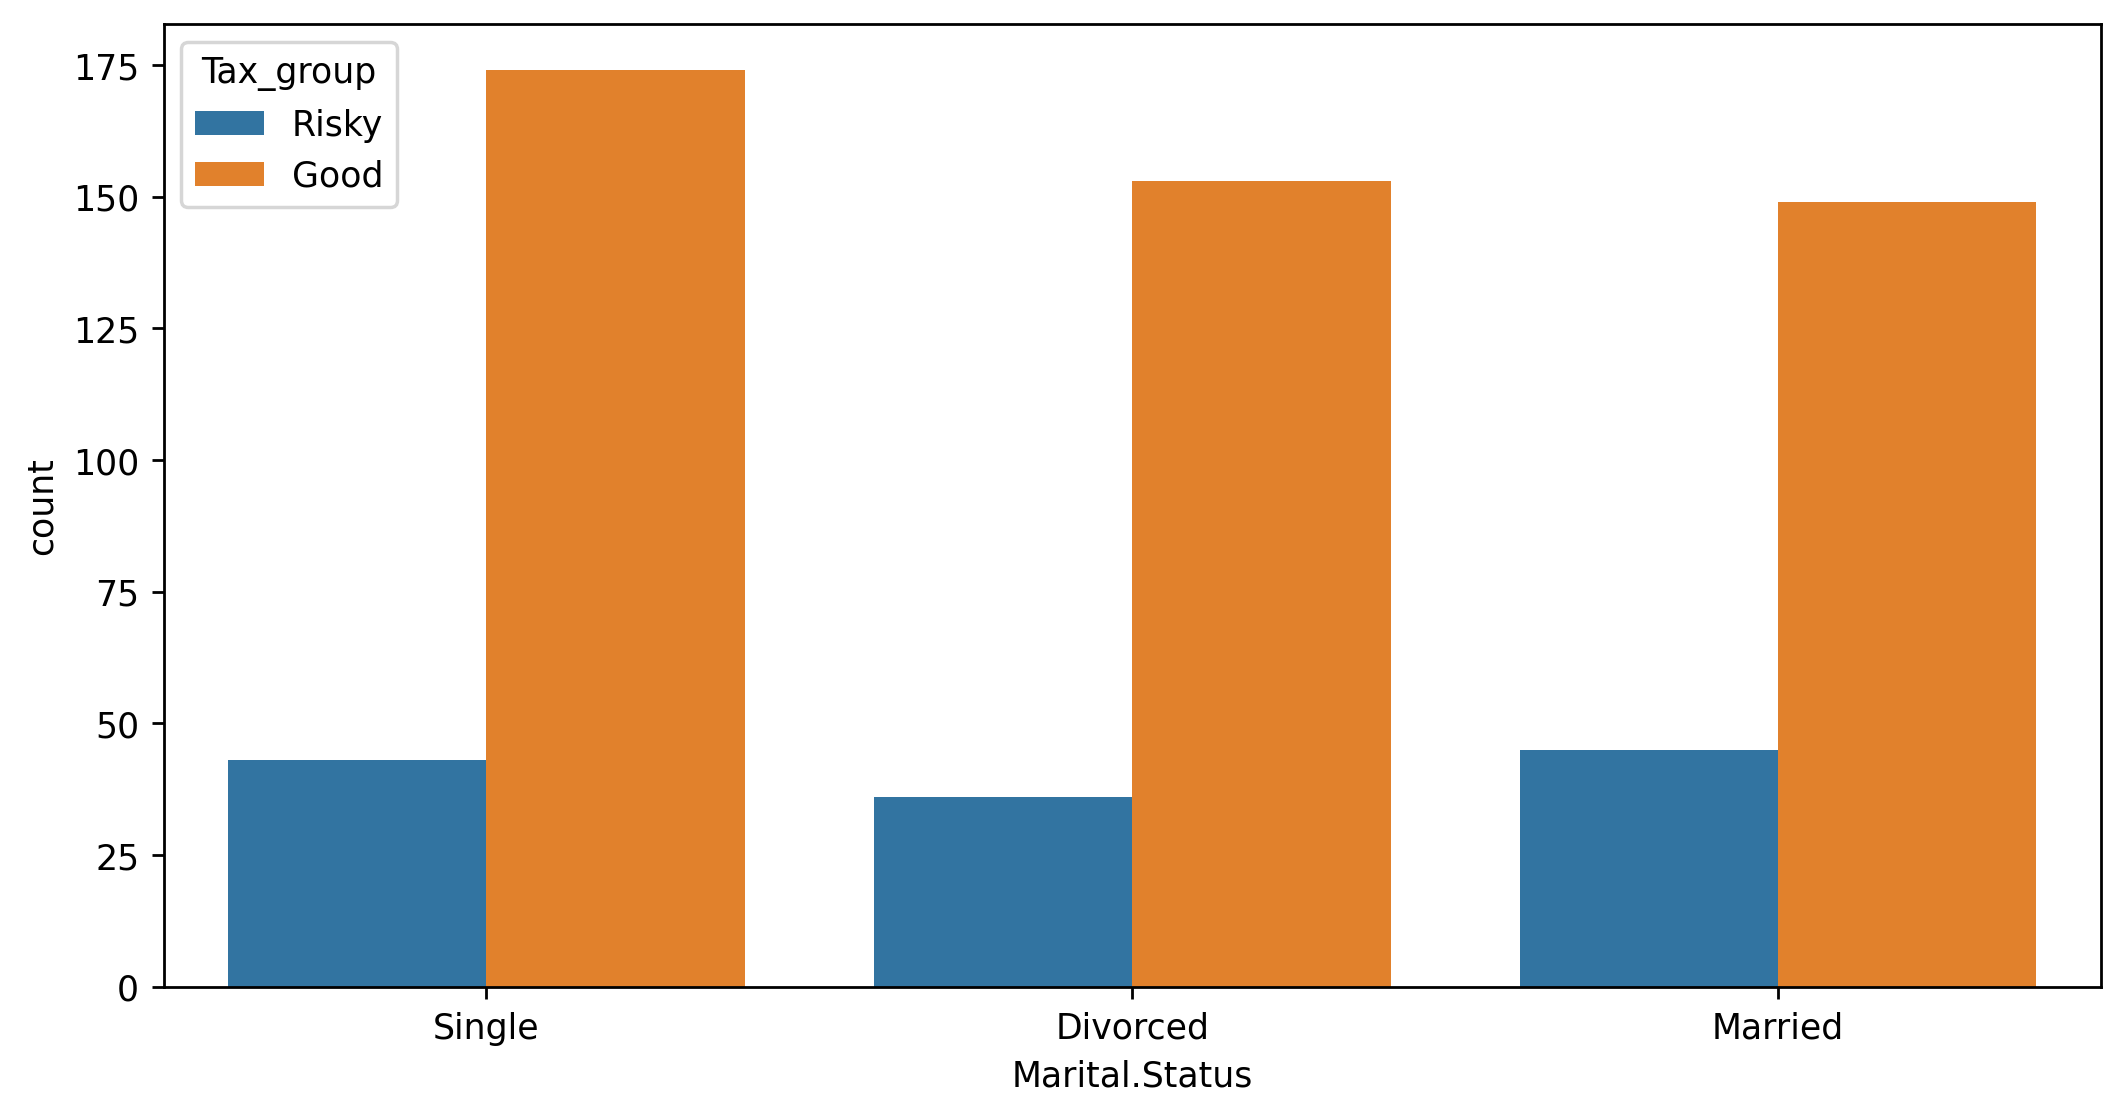

In [40]:
sns.countplot(df['Marital.Status'],hue=df['Tax_group'])

<AxesSubplot:xlabel='Urban', ylabel='count'>

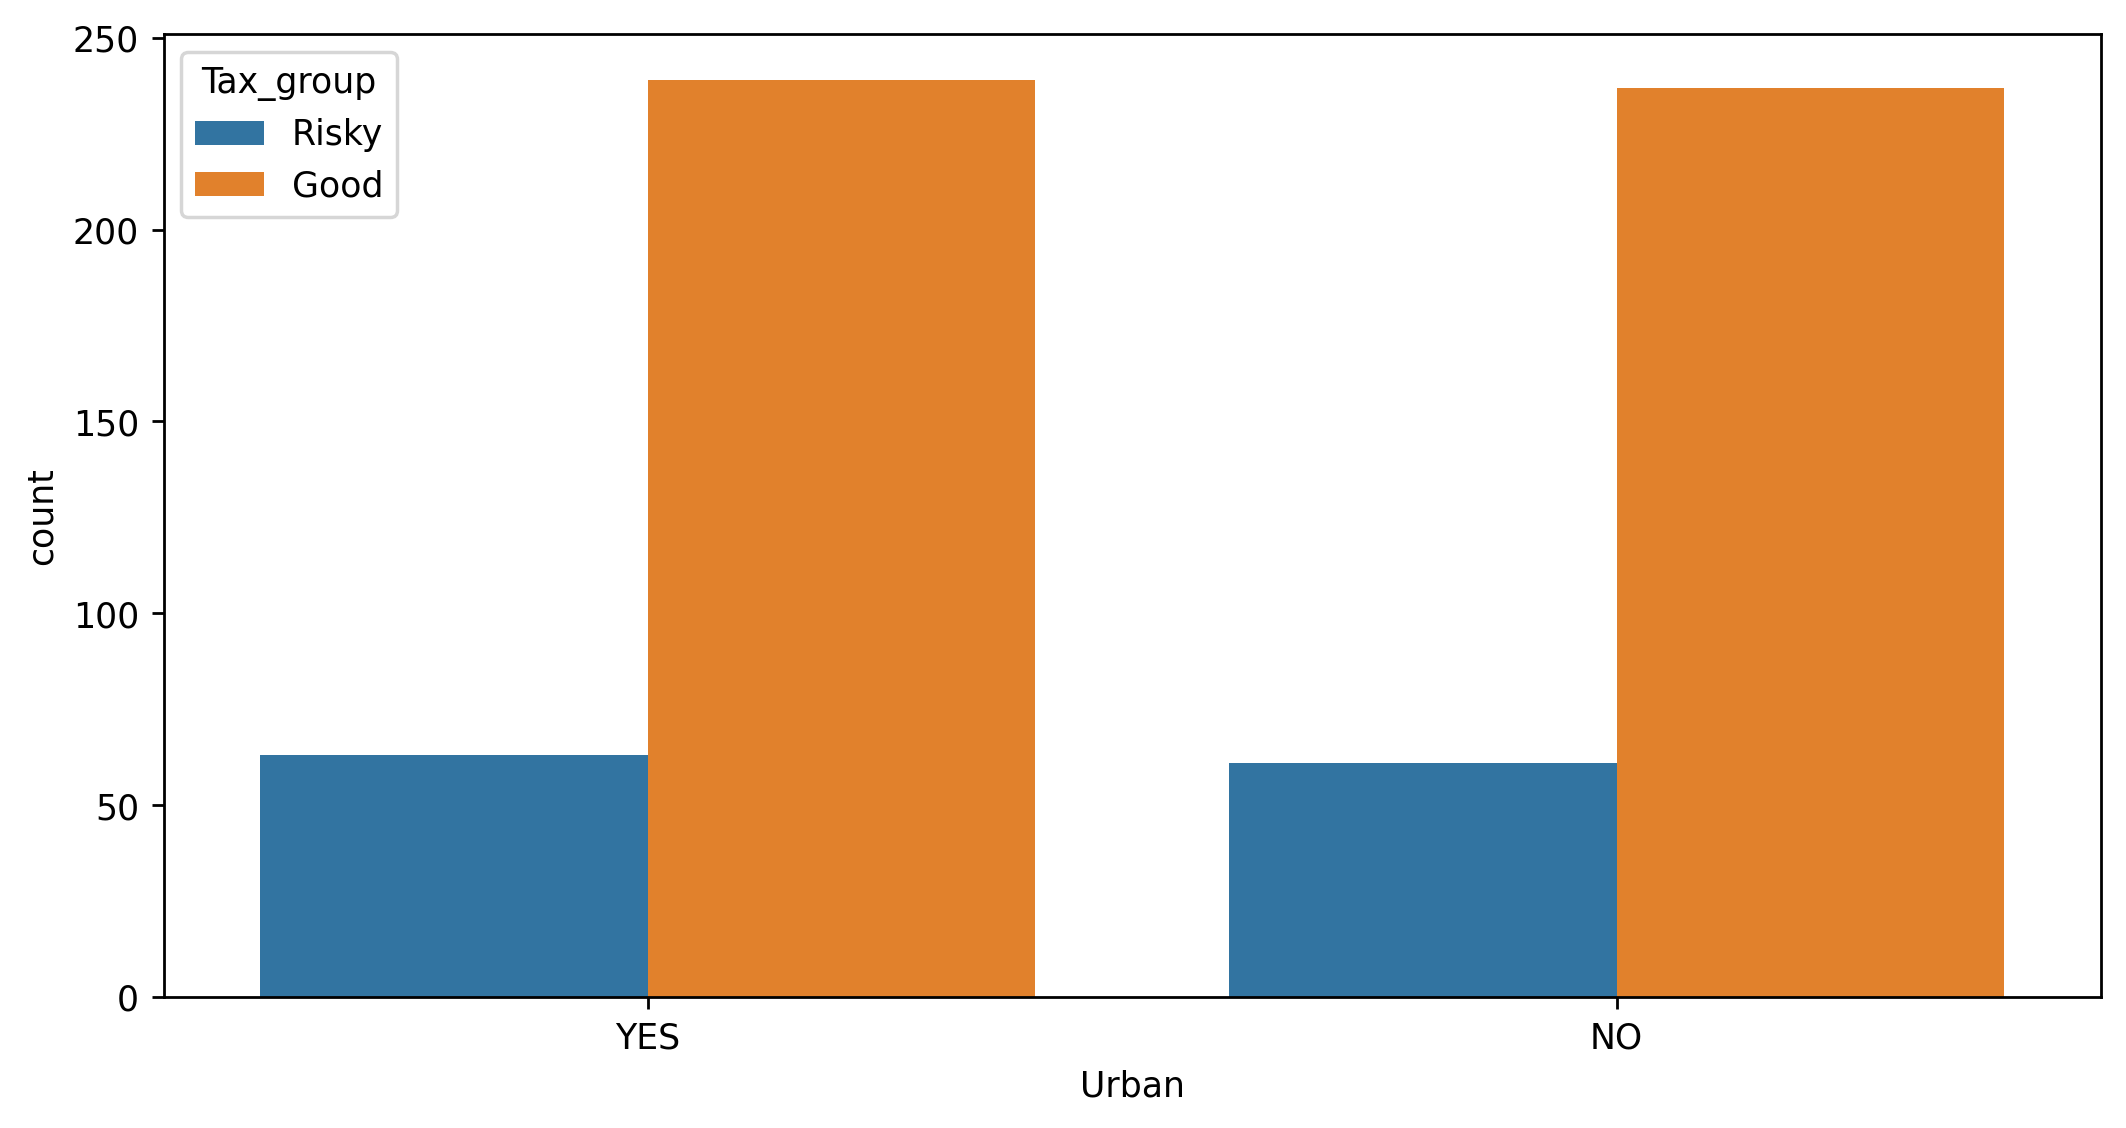

In [41]:
sns.countplot(df['Urban'],hue=df['Tax_group'])

In [45]:
df1=df.drop(['Taxable.Income'],axis=1)

In [47]:
df1.head(3)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_group
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good


# Encoding

In [1]:
le=LabelEncoder()

NameError: name 'LabelEncoder' is not defined

In [2]:
df1['Undergrad']=le.fit_transform(df1['Undergrad'])

NameError: name 'le' is not defined

In [54]:
df1['Marital.Status']=le.fit_transform(df1['Marital.Status'])

In [55]:
df1['Urban']=le.fit_transform(df1['Urban'])

In [60]:
df1['Tax_group']=le.fit_transform(df1['Tax_group'])

In [61]:
df1.head(3)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_group
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0


# Spliting Data into train & test

In [62]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [65]:
x.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1


In [66]:
from sklearn.model_selection import train_test_split

In [73]:
xtrain,xtest, ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

# Model Building

In [74]:
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
ypred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74        97
           1       0.14      0.22      0.17        23

    accuracy                           0.60       120
   macro avg       0.47      0.45      0.45       120
weighted avg       0.66      0.60      0.63       120



In [78]:
print('Training Accuracy:',dt.score(xtrain,ytrain))
print('Testing Accuracy:',dt.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 0.6


# Hyperparameter tuninig

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
params={'criterion':["gini", "entropy"],
        'splitter' :["best", "random"],
        'max_depth':[1,2,3,4,5] ,
         'min_samples_split':[2,3,4,5,6,7],
         'min_samples_leaf':[1,2,3,4]}

In [81]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=params,verbose=2)

In [82]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, m

[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=6, splitter=ra

[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=5, splitte

[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=6, splitter=ra

[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitte

[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=ra

[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=

[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=

[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=

[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitte

[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=ra

[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=ra

[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=ra

[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_s

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, m

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, m

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_s

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_s

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, m

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_s

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_s

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_s

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_s

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             verbose=2)

In [83]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'splitter': 'random'}

# Final Model

In [84]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_leaf=2,min_samples_split=7,splitter="random")
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=params,verbose=2)

In [86]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, m

[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=7, splitter=ra

[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, splitter=ra

[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitte

[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6, splitte

[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, splitte

[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitte

[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=ra

[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=6, splitte

[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=ra

[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=ra

[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=ra

[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, splitter=ra

[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, m

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, m

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=4, min_s

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, m

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, m

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_s

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_s

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, m

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_s

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             verbose=2)

In [87]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        97
           1       0.00      0.00      0.00        23

    accuracy                           0.81       120
   macro avg       0.40      0.50      0.45       120
weighted avg       0.65      0.81      0.72       120



In [88]:
print('Training Accuracy:',dt.score(xtrain,ytrain))
print('Testing Accuracy:',dt.score(xtest,ytest))

Training Accuracy: 0.7895833333333333
Testing Accuracy: 0.8083333333333333


# Ploting Tree

In [89]:
from sklearn import tree

[Text(0.4375, 0.9, 'Work.Experience <= 2.961\nentropy = 0.742\nsamples = 480\nvalue = [379, 101]\nclass = Good'),
 Text(0.20833333333333334, 0.7, 'Marital.Status <= 1.649\nentropy = 0.523\nsamples = 34\nvalue = [30, 4]\nclass = Good'),
 Text(0.16666666666666666, 0.5, 'Undergrad <= 0.592\nentropy = 0.667\nsamples = 23\nvalue = [19, 4]\nclass = Good'),
 Text(0.08333333333333333, 0.3, 'City.Population <= 141815.854\nentropy = 0.811\nsamples = 12\nvalue = [9, 3]\nclass = Good'),
 Text(0.041666666666666664, 0.1, 'entropy = 0.881\nsamples = 10\nvalue = [7, 3]\nclass = Good'),
 Text(0.125, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Good'),
 Text(0.25, 0.3, 'Work.Experience <= 0.497\nentropy = 0.439\nsamples = 11\nvalue = [10, 1]\nclass = Good'),
 Text(0.20833333333333334, 0.1, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = Good'),
 Text(0.2916666666666667, 0.1, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = Good'),
 Text(0.25, 0.5, 'entropy = 0.0\nsamples = 11\nva

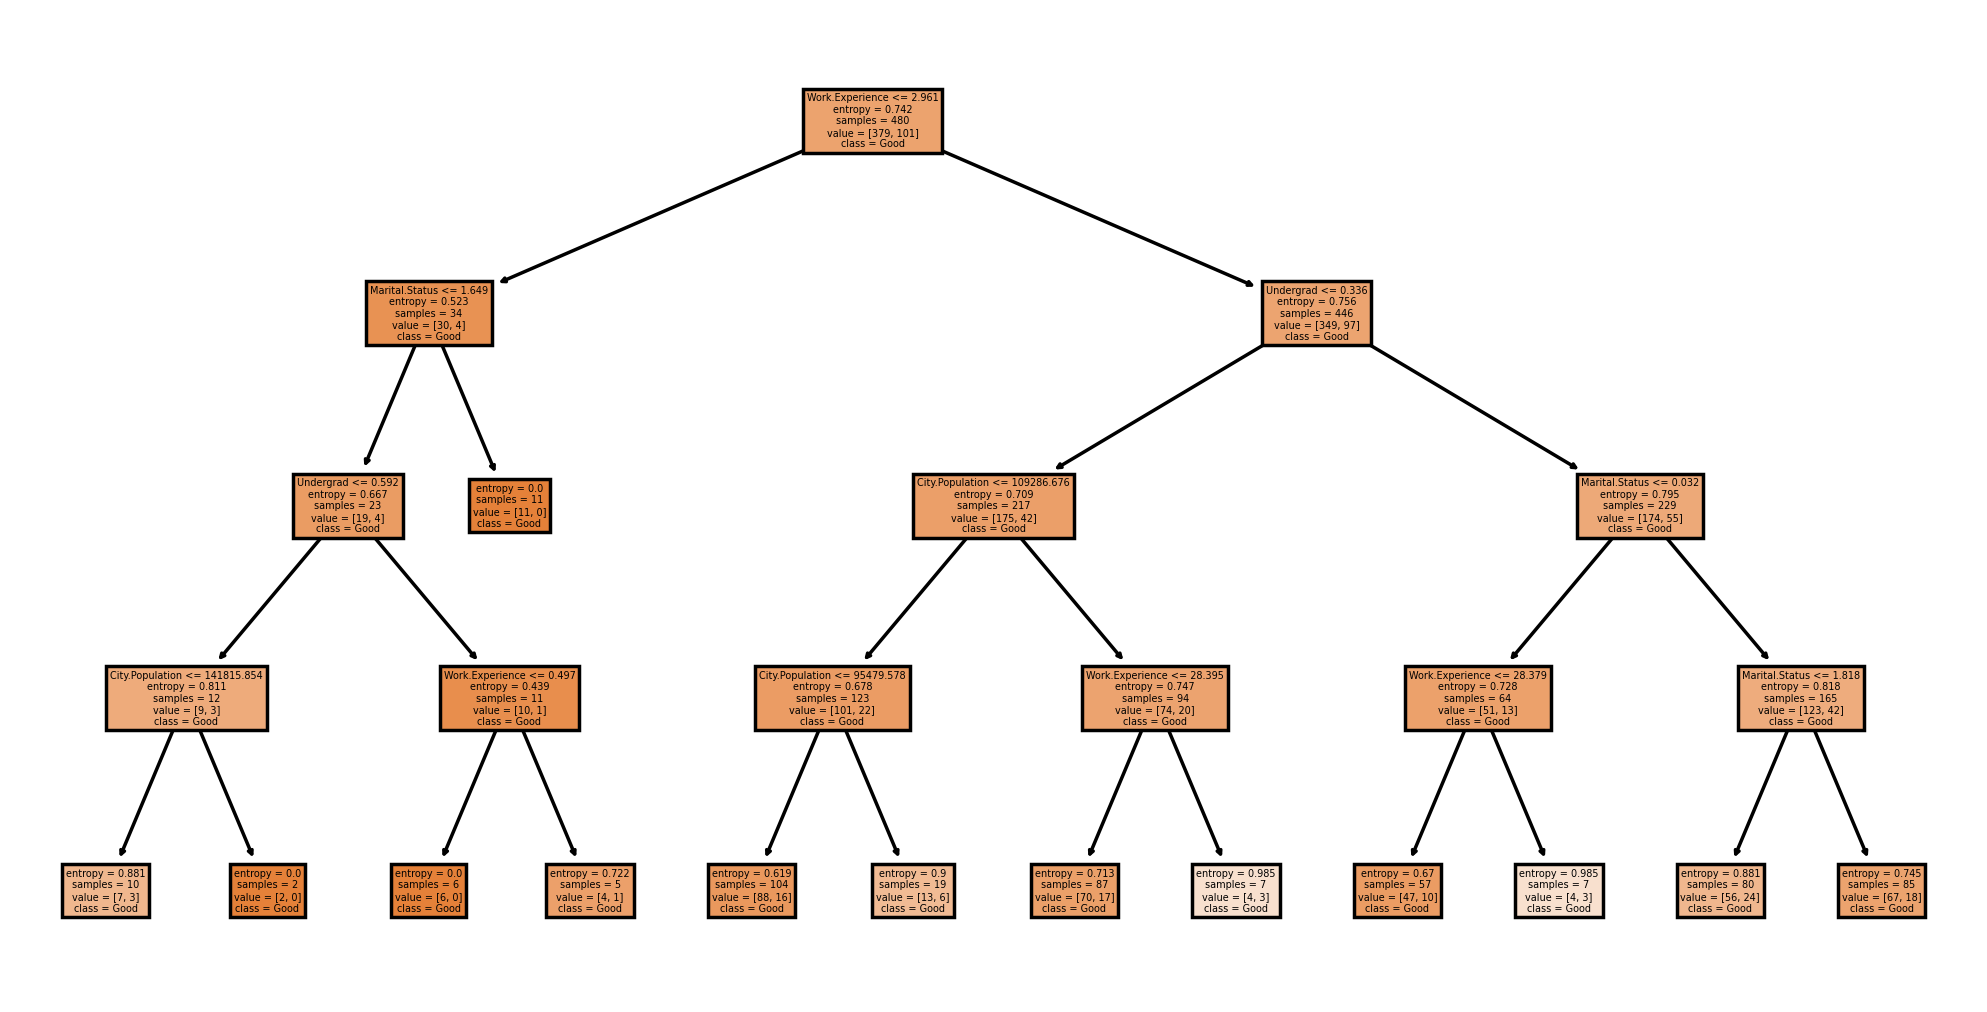

In [92]:
tree.plot_tree(dt,feature_names=x.columns,class_names=['Good','Risky'],filled=True)